Starting with the prediction  
1)already downloaded the data needed  
2)we try to take every asspect into consideration but this is the first time

First thing is to load the data from the csv

In [24]:
import numpy as np
import pandas as pd
import os

datapath = "house-prices-advanced-regression-techniques"
trainfile = "train.csv"

dta = pd.read_csv(os.path.join(datapath,trainfile))
#removing elemets that doesnt contain atlest has 2 values
columns_to_keep = dta.columns[dta.nunique() > 1]
#print("number of coloums : ",columns_to_keep.shape)
data = dta[columns_to_keep]
#print(data)
#print(data['SalePrice'].head())
#storing the variables in a array to use 0 t0 80 insted of names 
data_dummy = pd.get_dummies(data)
variables = data_dummy.columns.to_list()
#print(variables)
print(data_dummy)
print(data_dummy.shape, " : shape of dummy")
print(data.shape," : shape of data")

        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLw  \
0          2003          2003    

We would like to see the co-relation between each pair of variables  
So we first calculate them and represent them as a grid of 81*81 ,each (i,j) representing co-relation between i and j

In [25]:
def co_relation(i, j):
    (n, m) = data.shape
    x = variables[i]
    y = variables[j]
    
    sum_x = 0
    sum_y = 0
    count = 0
    
    # Iterate over all rows and check for NaN values
    for p in range(n):
        if pd.notna(data_dummy.loc[p, x]) and pd.notna(data_dummy.loc[p, y]):
            sum_x += data_dummy.loc[p, x]
            sum_y += data_dummy.loc[p, y]
            count += 1
    
    # Calculate means
    x_mean = sum_x / count
    y_mean = sum_y / count
    
    num = 0
    denom1 = 0
    denom2 = 0
    
    # Iterate again to calculate correlation components
    for p in range(n):
        if pd.notna(data_dummy.loc[p, x]) and pd.notna(data_dummy.loc[p, y]):
            num += (data_dummy.loc[p, x] - x_mean) * (data_dummy.loc[p, y] - y_mean)
            denom1 += (data_dummy.loc[p, x] - x_mean)**2
            denom2 += (data_dummy.loc[p, y] - y_mean)**2
    
    # Final correlation calculation
    co_reltn = num / np.sqrt(denom1 * denom2)
    return co_reltn

#can use corr function to find the correlation
print(co_relation(0,1))
print(data_dummy[variables[0]].corr(data_dummy[variables[1]]))

0.011156478201382672
0.011156478201382648


Now we want to visualize the co-relation between pairs

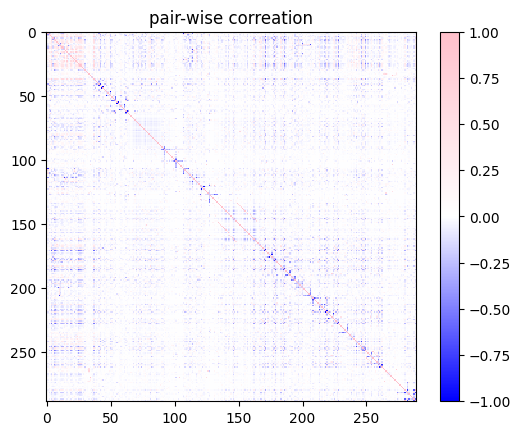

In [33]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
#(n,m) = data_dummy.shape
m = 20
"""
intencity = np.zeros((m,m))
for i in range(m) :
    for j in range(m) :
        intencity[i][j] = data_dummy[variables[i]].corr(data_dummy[variables[j]],method="pearson")
"""
#correlation of the complete matrix can be done using .corr on th matrix
intencity = data_dummy.corr()
colors = ['blue', 'white', 'pink']  # Color transition: from blue for -1 to white, then pink for +1
ncolors = 256  # Number of discrete colors in the colormap
cmap = LinearSegmentedColormap.from_list("pink_white_inverse", colors, N=ncolors)
plt.imshow(intencity,cmap=cmap,interpolation='nearest',vmin=-1,vmax=1)
plt.colorbar()
plt.title("pair-wise correation")
plt.show()